<a href="https://colab.research.google.com/github/phycoding/Emotion_detection/blob/main/facial_expression_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Keggle dataset by the following methoad and explore the facial expression dataset.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!pwd

/content/drive/MyDrive/kaggle


In [ ]:
!kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge

 95% 92.0M/96.6M [00:01<00:00, 46.3MB/s]
100% 96.6M/96.6M [00:01<00:00, 60.7MB/s]


In [ ]:
!ls
!unzip \*.zip  && rm *.zip

facial-expression-recognitionferchallenge.zip  kaggle.json
fer2013					       Submission.csv
Archive:  facial-expression-recognitionferchallenge.zip
replace Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Submission.csv          
  inflating: fer2013/fer2013/README  
  inflating: fer2013/fer2013/fer2013.bib  
  inflating: fer2013/fer2013/fer2013.csv  


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/kaggle/fer2013/fer2013/fer2013.csv")

In [ ]:
data.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
for i in ['emotion', 'Usage']:
    print(data[i].unique())

[0 2 4 6 3 5 1]
['Training' 'PublicTest' 'PrivateTest']


In [ ]:
# changing the pixels to numpy array
import numpy as np
X = data['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48, 1).astype('float32'))
X = np.stack(X, axis=0)
X.shape

(35887, 48, 48, 1)

In [ ]:
lookup = ('anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral')
y = data['emotion']

In [ ]:
X[0].reshape((48,48)).shape 

(48, 48)

In [ ]:
import matplotlib.pyplot as plt
def plot_index():
  index = int(input('Enter Value: '))
  plt.imshow(X[index].reshape((48,48)),cmap='gray')
  plt.title(lookup[y[index]])

Enter Value: 808


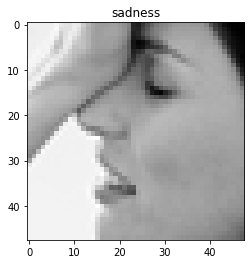

In [ ]:
plot_index()

No handles with labels found to put in legend.


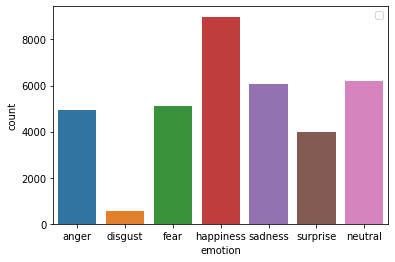

In [ ]:
import seaborn as sns
sns.countplot(x=y)
plt.xticks(range(7),lookup)
plt.legend()

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
img_labels = le.fit_transform(y)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape


(35887, 7)

In [ ]:
img_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# devide images by 255. so that values range between 0 to 1
X = X/255.
np.max(X)

1.0

In [ ]:
# Deviding train set and valid set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,img_labels,test_size = 0.3,random_state=42)

In [ ]:
X_valid.shape,y_valid.shape

((10767, 48, 48, 1), (10767, 7))

In [ ]:
X[0].shape

(48, 48, 1)

In [ ]:
import keras

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=64,kernel_size=(5,5),input_shape = (48,48,1),
                                                     activation='elu',padding='same',kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(filters=64,kernel_size=(5,5),
                                                     activation='elu',padding='same',kernel_initializer='he_normal'),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Dropout(0.4),
                                 keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',
                                                     kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                              
                                 keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',
                                                     kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),

                                 keras.layers.Conv2D(filters = 256,kernel_size = (3, 3),activation = 'elu',
                                                    padding ='same',kernel_initializer = 'he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Conv2D(filters = 256,kernel_size = (3, 3),activation = 'elu',
                                                    padding ='same',kernel_initializer = 'he_normal'),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Dropout(0.6),
                                 keras.layers.Flatten(name='flatten'),
                                 keras.layers.Dense(128,activation='elu',kernel_initializer='he_normal'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.6),
                                 keras.layers.Dense(units=7,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=100)

Epoch 1/100
785/785 [==============================] - 65s 24ms/step - loss: 1.8725 - accuracy: 0.3024 - val_loss: 1.5171 - val_accuracy: 0.4543
Epoch 2/100
785/785 [==============================] - 18s 23ms/step - loss: 1.3240 - accuracy: 0.4950 - val_loss: 1.2589 - val_accuracy: 0.5332
Epoch 3/100
785/785 [==============================] - 18s 23ms/step - loss: 1.1508 - accuracy: 0.5662 - val_loss: 1.2341 - val_accuracy: 0.5371
Epoch 4/100
785/785 [==============================] - 18s 23ms/step - loss: 1.0341 - accuracy: 0.6058 - val_loss: 1.1148 - val_accuracy: 0.5845
Epoch 5/100
785/785 [==============================] - 18s 23ms/step - loss: 0.9325 - accuracy: 0.6529 - val_loss: 1.1413 - val_accuracy: 0.5954
Epoch 6/100
785/785 [==============================] - 18s 23ms/step - loss: 0.7999 - accuracy: 0.7104 - val_loss: 1.2510 - val_accuracy: 0.5981
Epoch 7/100
785/785 [==============================] - 18s 23ms/step - loss: 0.6498 - accuracy: 0.7638 - val_loss: 1.2318 - val_ac

In [ ]:
history = model.history

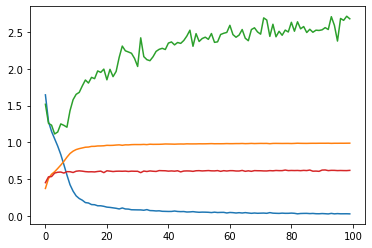

In [ ]:
plt.plot(pd.DataFrame(history.history))

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
model.save_weights("/content/drive/MyDrive/kaggle/assets")

In [ ]:
import keras

In [ ]:
my_model = keras.models.load_model("/content/drive/MyDrive/kaggle")

In [ ]:
pd.DataFrame(my_model.predict(X_valid[:1]))

,0,1,2,3,4,5,6
0,1.825755e-07,1.666959e-12,8.870199e-11,1.0,9.818144e-09,2.941789e-10,1.334603e-10


In [ ]:
result = my_model.predict(X_valid[:1])

In [ ]:
y_valid[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

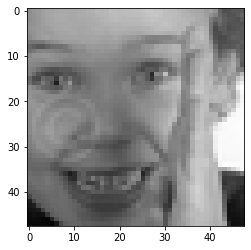

In [ ]:
plt.imshow(X_valid[0].reshape(48,48),cmap='gray')

In [ ]:
result.tolist()[0]

[1.8257358647133515e-07,
 1.6669428424403998e-12,
 8.870181672504529e-11,
 0.9999997615814209,
 9.81814363143485e-09,
 2.9417723812485974e-10,
 1.3346029836824869e-10]

In [ ]:
np.argmax(result)

3

In [ ]:

tt = np.where(result.tolist()[0] == np.max(result.tolist()[0]))

In [ ]:
for item in tt:
  print(lookup[int(item)])

happiness


In [ ]:
X_valid[:0].shape

(0, 48, 48, 1)

Enter Value: 999


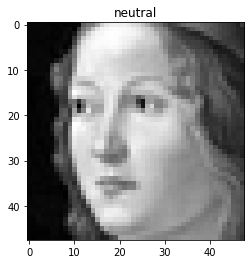

In [ ]:
plot_index()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_valid,axis=1),np.argmax(my_model.predict(X_valid),axis=1)))


              precision    recall  f1-score   support

           0       0.49      0.57      0.53      1467
           1       0.82      0.47      0.60       167
           2       0.56      0.41      0.47      1566
           3       0.81      0.83      0.82      2714
           4       0.50      0.48      0.49      1793
           5       0.76      0.72      0.74      1190
           6       0.53      0.61      0.57      1870

    accuracy                           0.62     10767
   macro avg       0.64      0.59      0.60     10767
weighted avg       0.62      0.62      0.62     10767



In [ ]:
my_model.save('my_model.h5')

In [ ]:
from google.colab import files
files.download('my_model.h5')

In [ ]:
!pip install colabcode
!pip install fastapi

     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 747kB 36.0MB/s 
     |████████████████████████████████| 8.3MB 40.6MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 430kB 42.6MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 399kB 52.0MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 122kB 62.2MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=2cada5cb493f98fbc3db7706c70f9aa296aae23a3ac18a1b3962fb1d9e60ff6d
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have torna

     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 61kB 574kB/s 


In [ ]:
import numpy as np

In [ ]:
my_model.predict(np.random.randn(1,48,48,1)).shape

(1, 7)

In [ ]:
np.random.randn(1,7)

array([[ 3.09282932, -0.48147191,  0.49059131,  0.98214318,  2.6254032 ,
        -0.38305978,  0.64597384]])

In [ ]:
print(np.random.randn(1,48,48,1))

[[[[-1.2749708 ]
   [-0.34481946]
   [-1.15241206]
   ...
   [-0.3374982 ]
   [-0.92123038]
   [ 0.20956138]]

  [[-0.45578884]
   [ 0.3009767 ]
   [ 1.13369955]
   ...
   [-0.80910939]
   [-1.10480897]
   [ 1.14918203]]

  [[ 1.21713015]
   [ 0.83360501]
   [ 1.10246516]
   ...
   [ 0.15597501]
   [ 2.00383807]
   [-0.50158507]]

  ...

  [[-0.5854027 ]
   [-1.40511748]
   [ 0.01515042]
   ...
   [-0.19917383]
   [-1.00123061]
   [-0.90194867]]

  [[-0.83821604]
   [ 0.75033341]
   [ 0.19052631]
   ...
   [ 0.42341579]
   [ 0.23766754]
   [-0.10114266]]

  [[-1.72766437]
   [ 0.07861476]
   [ 1.22651115]
   ...
   [ 1.21435192]
   [ 1.45015115]
   [ 0.00602006]]]]


In [ ]:
!pip install pydantic

     |████████████████████████████████| 10.1MB 23.0MB/s 


In [ ]:
np.array([])

array([], dtype=float64)

In [ ]:
from pydantic import BaseModel
class Music(BaseModel):
  class config:
    schema_extra = {
            "example": {
                'image' : np.random.randn(1,48,48,1),
                'output': np.random.randn(1,7)
                
            }
        }

In [ ]:
from fastapi import FastAPI
app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = keras.models.load_model("/content/drive/MyDrive/kaggle")

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}
@app.get('/predict')
def predict(data:Music):
  recieved = data.dict()
  image = recieved['image']
  output = recieved['output']
  pred = model.predict(image)
  return {'Prediction':pred}


In [ ]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [ ]:
server.run_app(app=app)

Public URL: NgrokTunnel: "https://642fc6336a69.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [63]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     157.41.155.145:0 - "GET / HTTP/1.1" 200 OK
INFO:     157.41.155.145:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     157.41.155.145:0 - "GET /predict HTTP/1.1" 422 Unprocessable Entity


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [63]
